# Align Experiment and Colloidal Ice object

In this script, I will align the first experimental video with a Cairo lattice.

In [1]:
import os
import glob
import sys
import copy as cp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline

sys.path.insert(0, '../icenumerics')
import icenumerics as ice
ureg = ice.ureg
import transformations as tr

sys.path.insert(0, '../Scripts/')
import support as sup
from importlib import reload  
reload(sup)

os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

%load_ext autoreload
%autoreload 2

In [2]:
directory =  "/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2"

In [3]:
filenames = [file for file in glob.glob(
    os.path.join(directory,('*.avi')))]

filenames = [f for f in filenames]
filenames

['/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_16_14_08_43.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_15_17_33_37.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_16_16_14_13.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_15_16_56_18.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_15_17_12_52.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_16_16_33_22.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=2_w=2_2022_02_16_16_53_05.avi',
 '/media/Carol/Dynamic/Experiments/Colloidal_Ice/Cairo_lattice/Analyzed_videos_h=2-w=2/Sample5_h=

## Collection of functions used to align 

In [4]:
def particle_locations_to_colloids(entry):
    
    nx = 5
    ny = 5
    a = 19.5458*ureg.um
    
    particle = ice.particle()

    trap_long = ice.trap(trap_sep = 10*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                   stiffness = 0.1*ureg.fN/ureg.nm)

    trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                  stiffness = 0.1*ureg.fN/ureg.nm)
    
    traps = []

    sp_cairo = sup.spins()
    v = ice.vertices()
    
    display(entry)
    
    sp_cairo.create_lattice(geometry = "cairo",size =[nx,ny],lattice_constant=a, border="periodic")
    
    for s in sp_cairo:
    
        if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
            s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):
        
            traps.append(trap_short)
        
        else:
        
            traps.append(trap_long)
            
    

    sp_cairo = tr.rotate(sp_cairo,(entry[["angle"]].values[0])*ureg.deg)
    sp_cairo = tr.scale(sp_cairo,entry[["scale"]].values*np.array([1,1]))
    sp_cairo = tr.translate(sp_cairo,entry[["x_offset","y_offset"]].values*ureg.um)
    
    col = ice.colloidal_ice(sp_cairo, particle, traps, height_spread = 0, susceptibility_spread = 0.1)
    
    return col

In [5]:
def strip_name(name,ext): 
    name = os.path.split(name)[-1]
    return name[:name.find(ext)]

### end collection of functions

In order to run de code we had to install pims and imageio-ffmpeg and add line:

    os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

In [6]:
pd.DataFrame(data = [], columns = ["name","scale","x_offset", "y_offset", "angle"]).to_csv(os.path.join(directory,"parameters.dat"),sep="\t")
parameters = pd.read_csv(os.path.join(directory,"parameters.dat"),sep = "\t", index_col = [0])

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fc322825d40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_16_14_08_43
scale                                       1.7
x_offset                                    -83
y_offset                                    392
angle                                         0
Name: Sample5_h=2_w=2_2022_02_16_14_08_43, dtype: object

(0, 320)

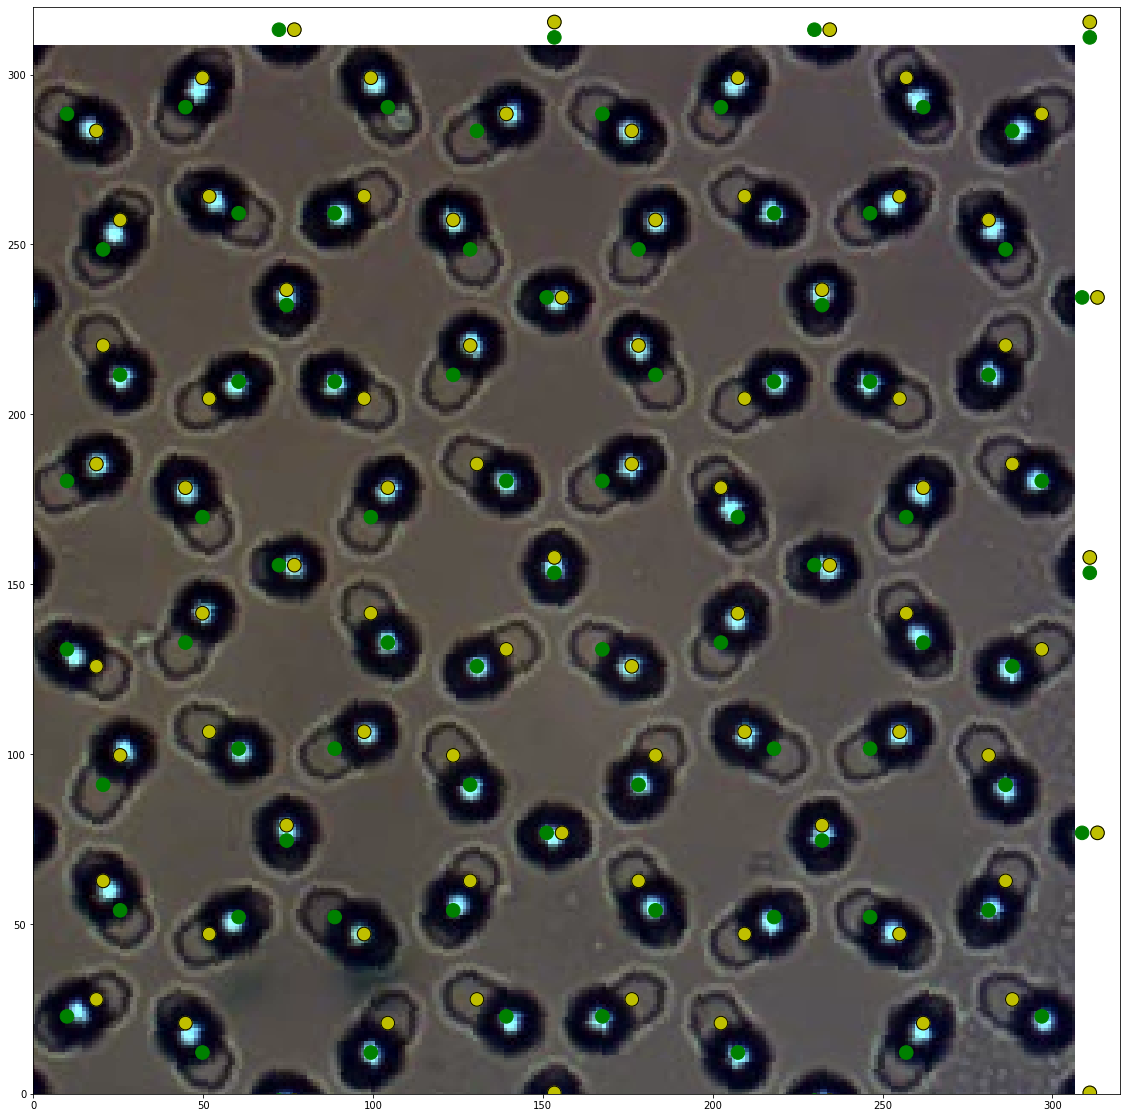

In [33]:
i = 0

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -83
parameters.loc[basename,"y_offset"] = 392
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Aligned!

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fc322825d40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_16_16_33_22
scale                                       1.7
x_offset                                     -4
y_offset                                    391
angle                                         0
Name: Sample5_h=2_w=2_2022_02_16_16_33_22, dtype: object

(0, 320)

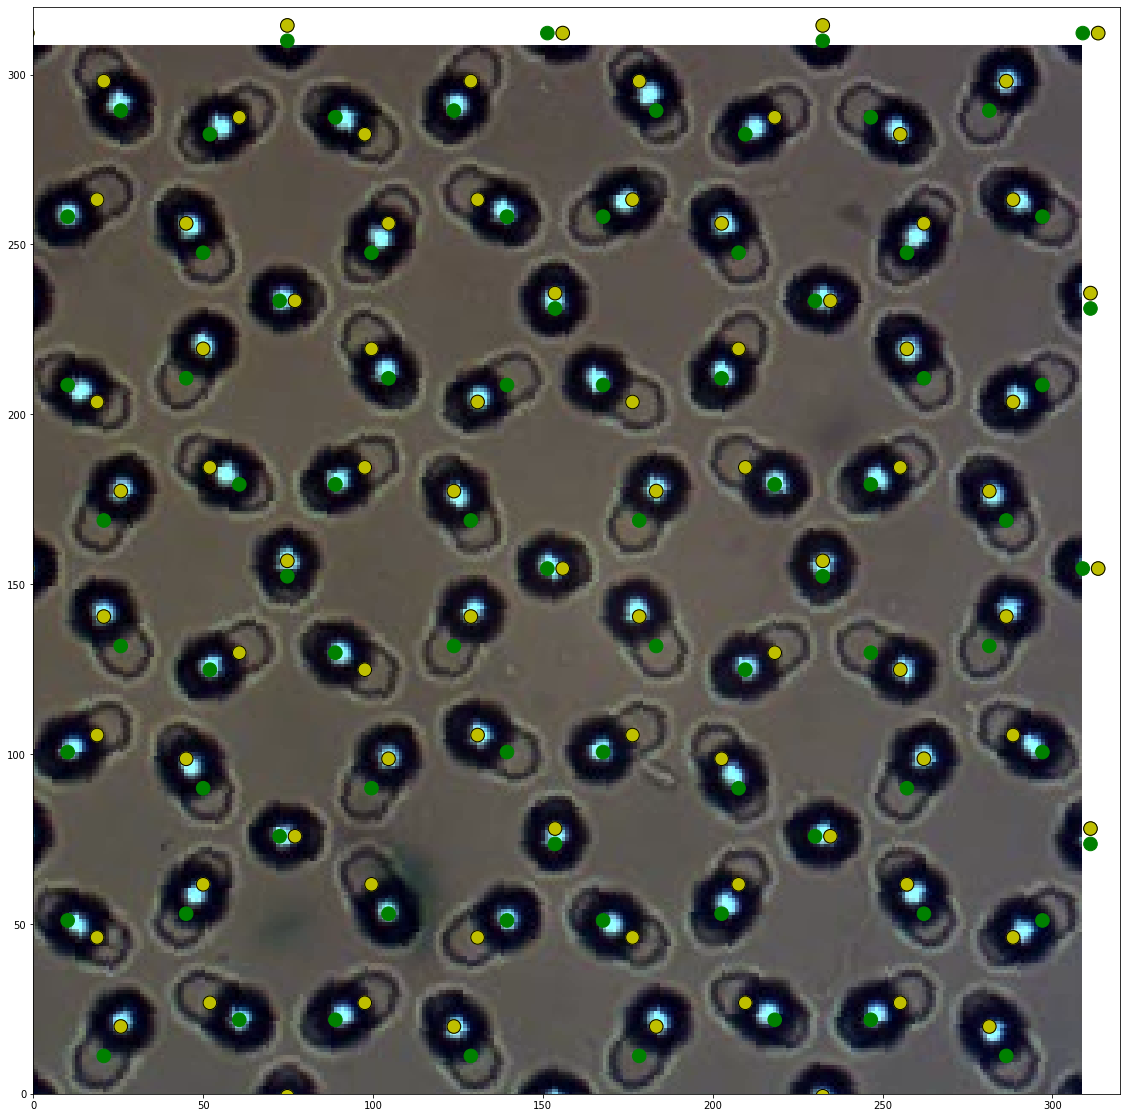

In [11]:
i = 5

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -4
parameters.loc[basename,"y_offset"] = 391
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fc322825d40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_16_16_14_13
scale                                       1.7
x_offset                                     -5
y_offset                                    391
angle                                         0
Name: Sample5_h=2_w=2_2022_02_16_16_14_13, dtype: object

(0, 320)

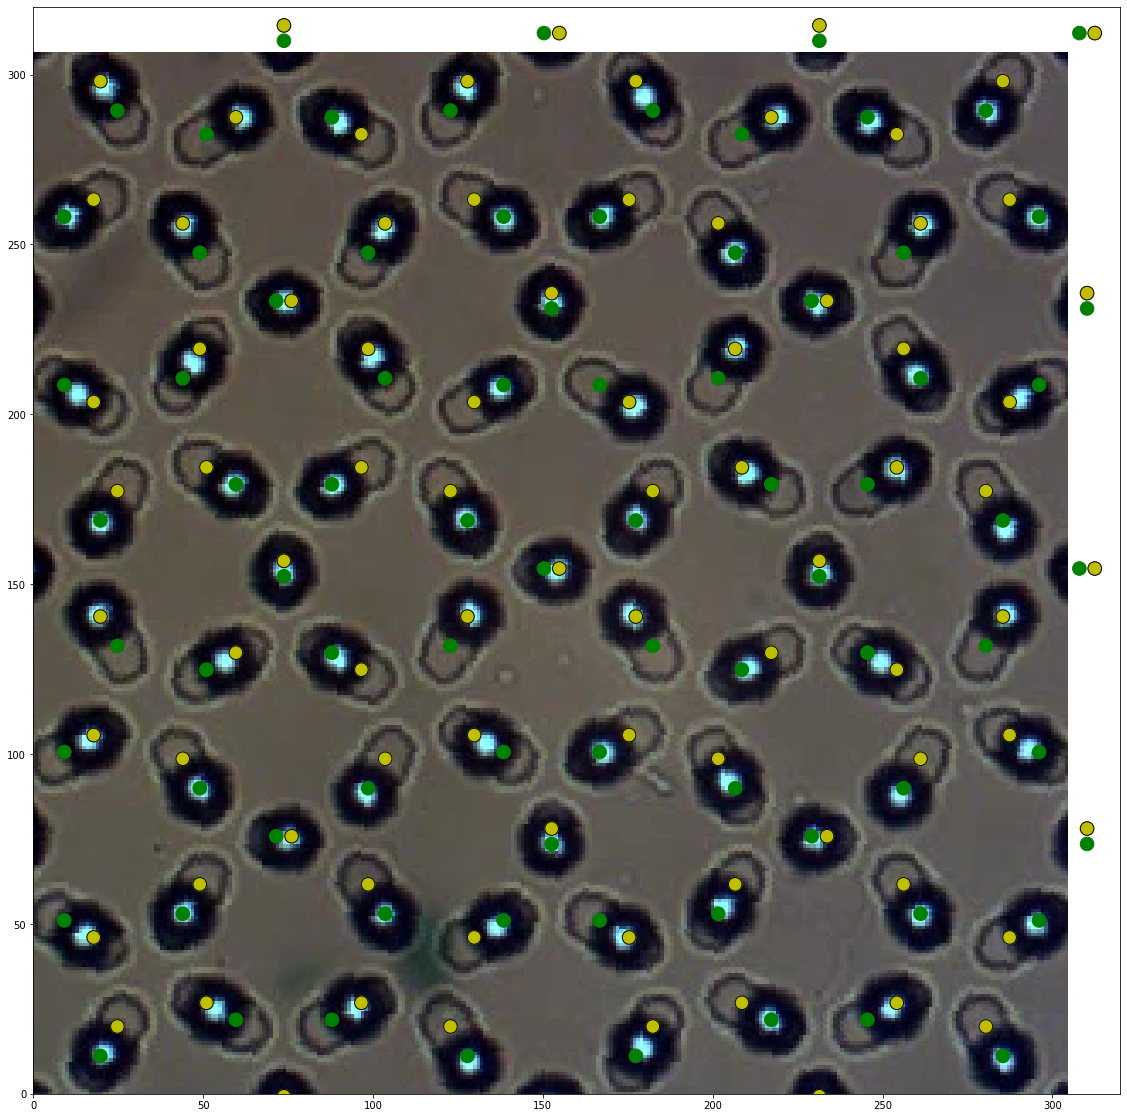

In [13]:
i = 2

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -5
parameters.loc[basename,"y_offset"] = 391
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fc322825d40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_16_15_57_59
scale                                       1.7
x_offset                                     -4
y_offset                                    392
angle                                         0
Name: Sample5_h=2_w=2_2022_02_16_15_57_59, dtype: object

(0, 320)

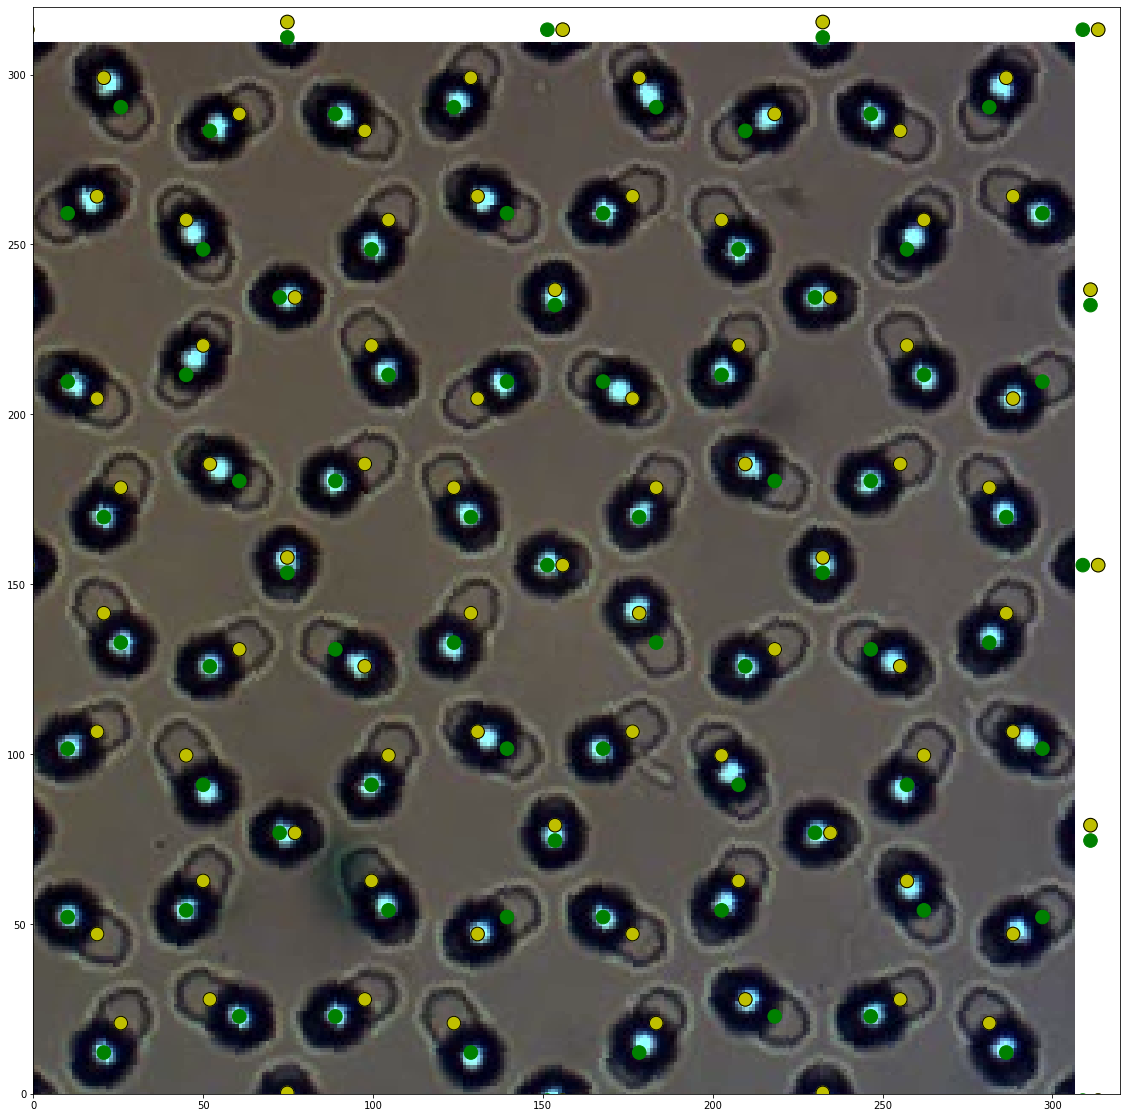

In [15]:
i = 8

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -4
parameters.loc[basename,"y_offset"] = 392
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fc322825d40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_16_14_35_34
scale                                       1.7
x_offset                                    -83
y_offset                                    390
angle                                         0
Name: Sample5_h=2_w=2_2022_02_16_14_35_34, dtype: object

(0, 320)

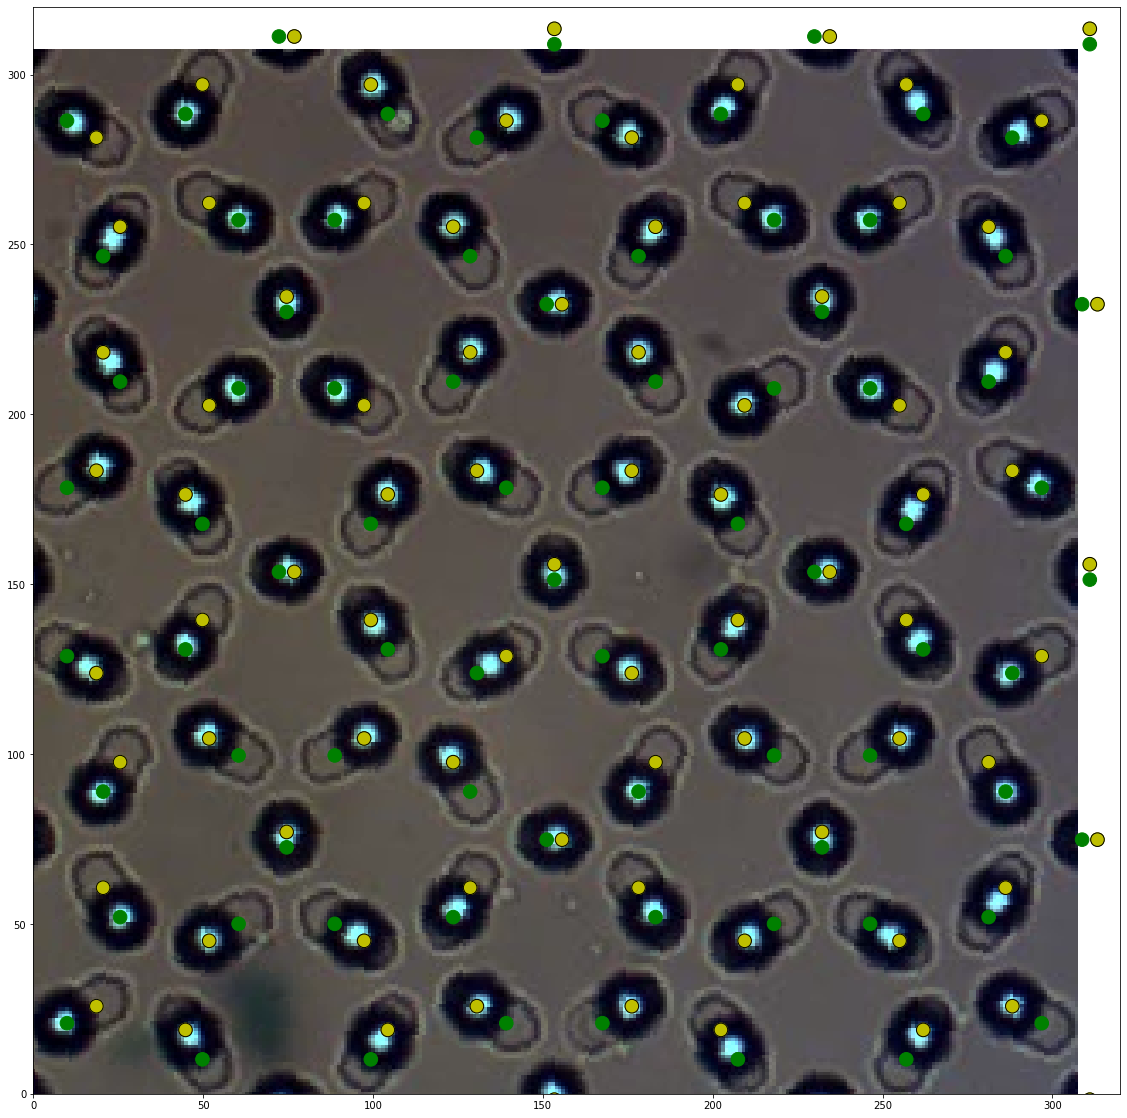

In [24]:
# Already aligned.
i = 7

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -83
parameters.loc[basename,"y_offset"] = 390
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fdb5ad2dd40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_15_16_13_12
scale                                       1.7
x_offset                                     -4
y_offset                                    392
angle                                         0
Name: Sample5_h=2_w=2_2022_02_15_16_13_12, dtype: object

(0, 320)

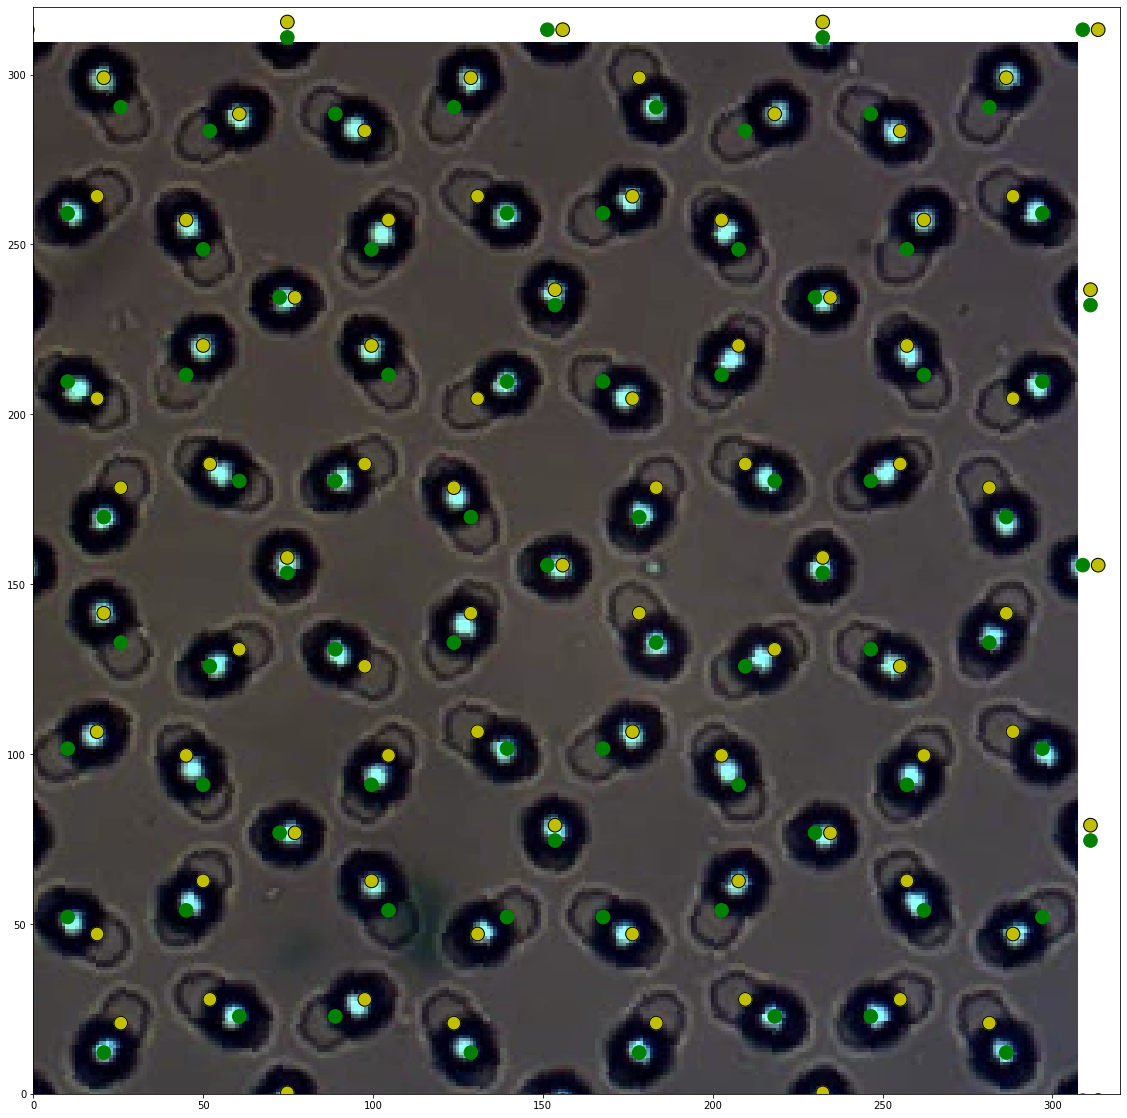

In [25]:
i = 5

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -4
parameters.loc[basename,"y_offset"] = 392
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)

Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7fdb5ad2dd40>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


name        Sample5_h=2_w=2_2022_02_15_16_37_19
scale                                       1.7
x_offset                                     -4
y_offset                                    388
angle                                         0
Name: Sample5_h=2_w=2_2022_02_15_16_37_19, dtype: object

(0, 320)

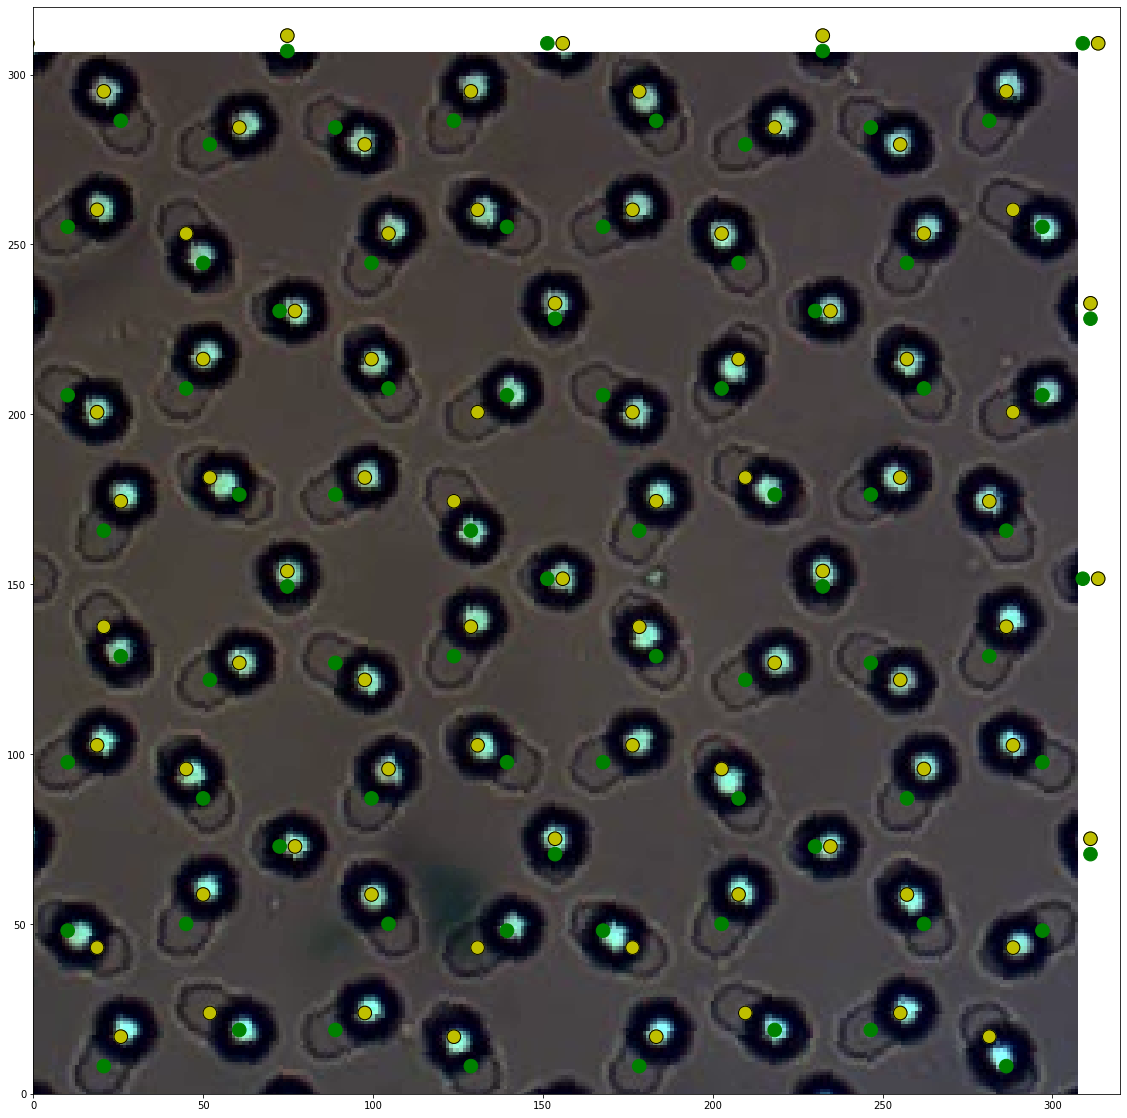

In [28]:
i = 6

fname = filenames[i]

basename = strip_name(fname,".avi")
parameters.loc[basename,"name"] = basename
parameters.loc[basename,"scale"] = 1.7
parameters.loc[basename,"x_offset"] = -4
parameters.loc[basename,"y_offset"] = 388
parameters.loc[basename,"angle"] = 0

fig, ax = plt.subplots(1,1,figsize=(20,20))

video = pm.open(fname)
col = particle_locations_to_colloids(parameters.loc[basename])

ax.imshow(video[0])
col.display(ax)
ax.set_xlim(0, 320)
ax.set_ylim(0, 320)